In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
from qhaos.models.kicked_rotor import floquet_operator
from qhaos.analysis.spectra import level_spacings
from qhaos.utils.plotting import plot_level_spacing_distribution


Shape: (256, 256)
ndim: 2
Is unitary: True
Type: <class 'numpy.ndarray'>
True


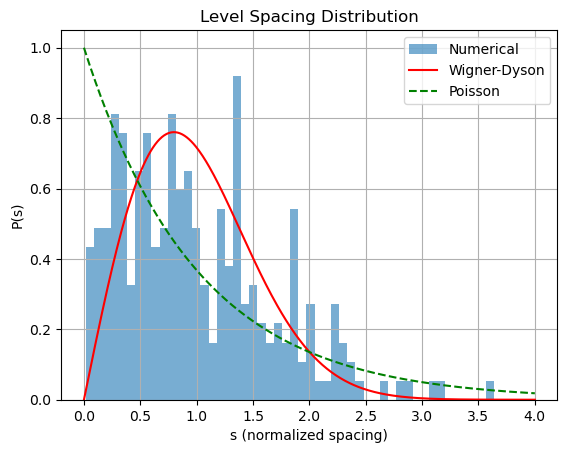

In [2]:


N = 256
K = 5.0
hbar = 2*np.pi/N

U = floquet_operator(N, K, hbar)

print("Shape:", U.shape)
print("ndim:", U.ndim)
print("Is unitary:", np.allclose(U.conj().T @ U, np.eye(256)))  # Should be True
print("Type:", type(U)) 
print(np.allclose(U.conj().T @ U, np.eye(256)))  # Should be True (unitary)

eigenphases = np.angle(np.linalg.eigvals(U))
spacings = level_spacings(eigenphases)
plot_level_spacing_distribution(spacings)

The probability density of observing a spacing of size $s$, $P(s)$, reflects the statistical properties of the spectrum – how likely is it that two levels are a certain distance apart.

A central result of quantum chaos is that quantum systems whose classical counterpart are chaotic exhibit universal spectral statistics. The figure above does not seem to show level repulsion nor does it fall off exponentially for larger $s$ suggesting that the system is not exhibiting quantum chaos under the current parameter choice. The histogram has a Poisson-like shape which suggests integrable or non-chaotic dynamics.

Study the change in kick strength $K$ or the Hilbert space size.



K = 0.5
K = 1.5
K = 3.0
K = 6.0
K = 10.0


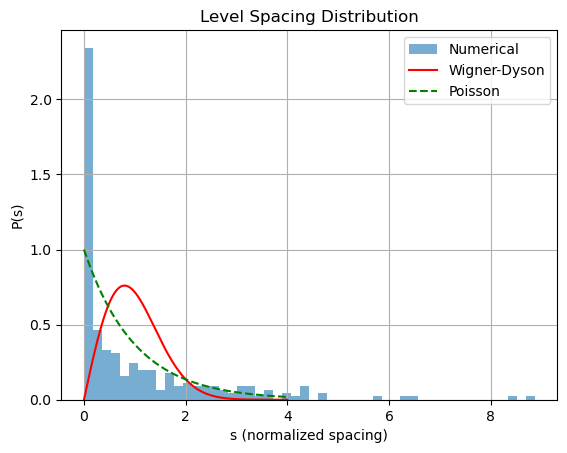

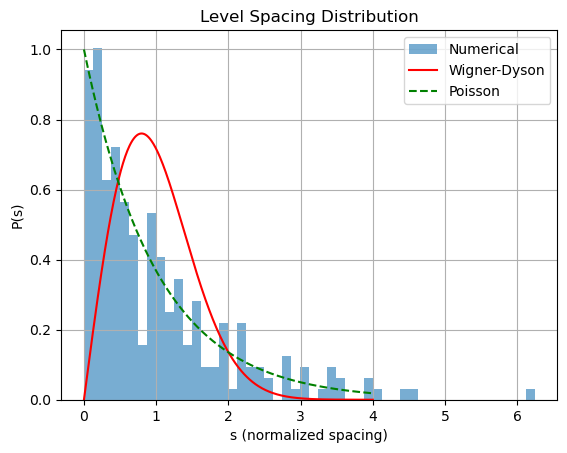

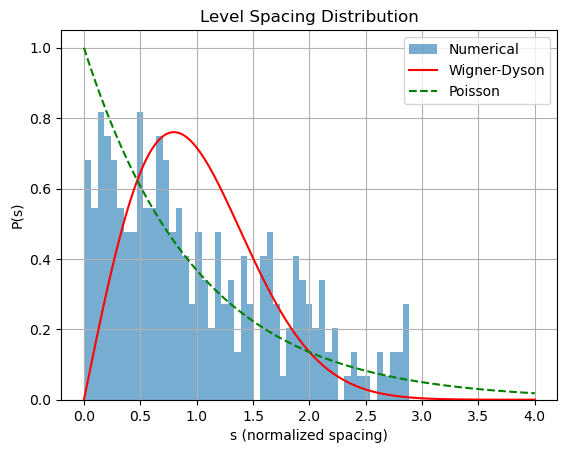

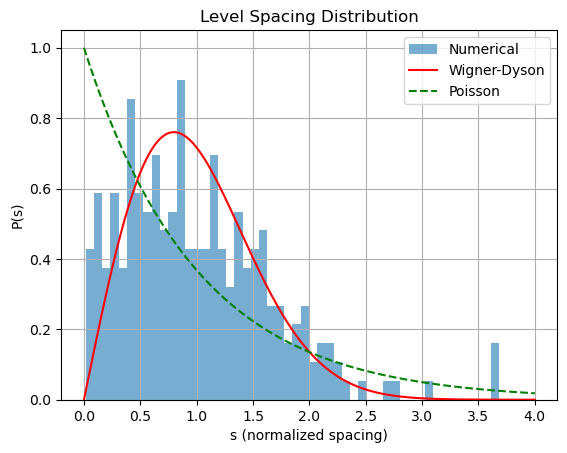

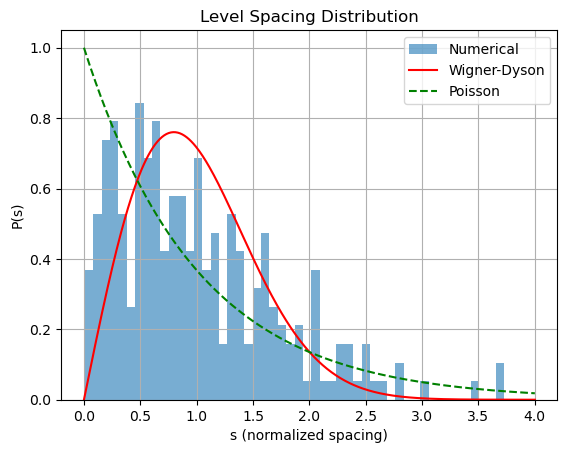

In [ ]:
K_values = [0.5, 1.5, 3.0, 6.0, 10.0]
N = 256
hbar = 2*np.pi/N

for K in K_values:
    U = floquet_operator(N, K, hbar)
    eigenphases = np.angle(np.linalg.eigvals(U))
    spacings = level_spacings(eigenphases)
    
    print(f"K = {K}")
    plot_level_spacing_distribution(spacings)

As the kick strength $K$ is increased the the level spacing distribution tends towards a Wigner-Dyson distribution and thus the system becomes more chaotic. 